In [20]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2

In [22]:
# Create Engine
conn = psycopg2.connect(database="postgres", user="postgres", password="key", port=5432)
salaries = pd.read_sql("SELECT * FROM salaries", conn)
#salaries.head()

In [ ]:
employees = pd.read_sql("SELECT * FROM employees", conn)
#employees.head()

In [25]:
dept_employee = pd.read_sql("SELECT * FROM dept_employee", conn)
dept_employee.head()

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [27]:
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [28]:
departments = pd.read_sql("SELECT * FROM departments", conn)
departments.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [29]:
salaries_titles = pd.merge(salaries, titles, on="emp_no", how="inner")
salaries_titles.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [45]:
salaries_titles_gp = salaries_titles.groupby("title").mean()
salaries_titles_gp = salaries_titles_gp.reset_index()
salaries_titles_gp.head()

,title,emp_no,salary
0,Assistant Engineer,251495.398533,48493.204786
1,Engineer,252943.159987,48539.781423
2,Manager,110780.833333,51531.041667
3,Senior Engineer,253034.375949,48506.751806
4,Senior Staff,253423.367183,58503.286614


In [30]:
employees_salaries = pd.merge(employees, salaries, on="emp_no", how="inner")
employees_salaries.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,1996-08-03,1997-08-03
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,1995-12-03,1996-12-02
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228,1989-09-12,1990-09-12


In [31]:
dept_emp_dept = pd.merge(dept_employee, departments, on="dept_no", how="inner")
dept_emp_dept.head()

,emp_no,dept_no,from_date,to_date,dept_name
0,10001,d005,1986-06-26,9999-01-01,Development
1,10006,d005,1990-08-05,9999-01-01,Development
2,10008,d005,1998-03-11,2000-07-31,Development
3,10012,d005,1992-12-18,9999-01-01,Development
4,10014,d005,1993-12-29,9999-01-01,Development


In [33]:
emp_sal_dept = pd.merge(employees_salaries, dept_emp_dept, on="emp_no", how="inner")
emp_sal_dept.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,d005,1986-06-26,9999-01-01,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,1996-08-03,1997-08-03,d007,1996-08-03,9999-01-01,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,1995-12-03,1996-12-02,d004,1995-12-03,9999-01-01,Production
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01,d004,1986-12-01,9999-01-01,Production
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228,1989-09-12,1990-09-12,d003,1989-09-12,9999-01-01,Human Resources


In [35]:
emp_sal_dept_gp = emp_sal_dept.groupby('dept_name').mean()
emp_sal_dept_gp.head()

,emp_no,salary
dept_name,,
Customer Service,253580.944656,47998.670441
Development,252932.489563,48697.334663
Finance,253224.873688,59533.516546
Human Resources,251452.356404,44678.646801
Marketing,256052.978032,61095.897383


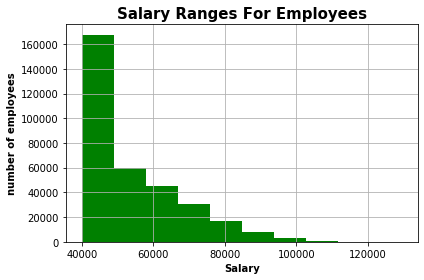

In [41]:
plt.hist(emp_sal_dept["salary"], color='g', alpha=1);

plt.xlabel("Salary", weight="bold");
plt.ylabel("number of employees", weight="bold");
plt.title("Salary Ranges For Employees", weight="bold", size=15)

plt.grid()
plt.tight_layout()

plt.savefig("salary_range.png")

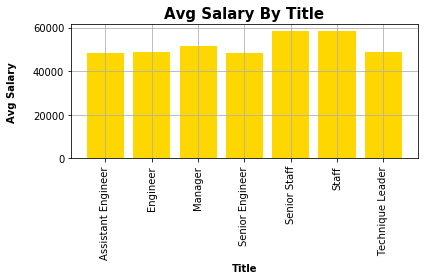

In [46]:
x_axis = salaries_titles_gp["title"]
y_axis = salaries_titles_gp["salary"]

plt.bar(x_axis, y_axis, color='gold', alpha=1)

tick = [value for value in x_axis]
plt.xticks(tick, x_axis, rotation=90);

plt.xlabel("Title", weight="bold")
plt.ylabel("Avg Salary\n", weight="bold")
plt.title("Avg Salary By Title", weight="bold", size=15)

plt.grid()
plt.tight_layout()

plt.savefig("Avg_Salary_By_Title.png")